In [5]:
# Interpolate an elevation profile given a set of distances on the map and associated elevations
#### O. Kaufmann, march-april 2017

In [6]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_left
from scipy.interpolate import PPoly, PchipInterpolator
from scipy.integrate import quad

### create a list of lists, each list in the list is [projected distance, elevation] of a single point alon the profile

In [7]:
known_points=[[0,284],[58,280],[152,275],[217,270],[228,267],[305,265],[340,260], [374,255], [397,250], [417,245], [459, 240], [484, 245], [539, 250], [687, 245]]

### convert it to a dataframe

In [8]:
df = pd.DataFrame(known_points, columns = ['Distance', 'Elevation'])
df

,Distance,Elevation
0,0,284
1,58,280
2,152,275
3,217,270
4,228,267
5,305,265
6,340,260
7,374,255
8,397,250
9,417,245


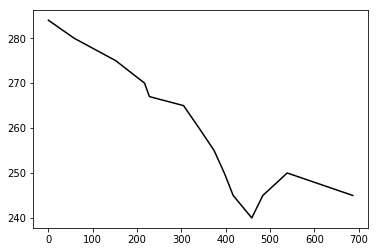

In [14]:
plt.plot(df['Distance'], df['Elevation'], '-k')

In [10]:
tirs = []
geophones_x = np.arange(5,475,5)
tirs_x = np.arange(2.5,522.5,20.)

In [11]:
for x in tirs_x:
    if not x in df['Distance']: 
        tirs.append([x, np.nan])

In [12]:
tirs

[[22.5, nan],
 [42.5, nan],
 [62.5, nan],
 [82.5, nan],
 [102.5, nan],
 [122.5, nan],
 [142.5, nan],
 [162.5, nan],
 [182.5, nan],
 [202.5, nan],
 [222.5, nan],
 [242.5, nan],
 [262.5, nan],
 [282.5, nan],
 [302.5, nan],
 [322.5, nan],
 [342.5, nan],
 [362.5, nan],
 [382.5, nan],
 [402.5, nan],
 [422.5, nan],
 [442.5, nan],
 [462.5, nan],
 [482.5, nan],
 [502.5, nan]]

In [13]:
df_tirs = pd.DataFrame(tirs, columns = ['Distance', 'Elevation'])
#df_tirs.set_index('Distance', inplace=True)
df_tirs

,Distance,Elevation
0,22.5,NaN
1,42.5,NaN
2,62.5,NaN
3,82.5,NaN
4,102.5,NaN
5,122.5,NaN
6,142.5,NaN
7,162.5,NaN
8,182.5,NaN
9,202.5,NaN


In [14]:
df_all = df.append(df_tirs, True)
df_all.sort_values('Distance', inplace=True)
df_all

,Distance,Elevation
0,0.0,284.0
14,22.5,NaN
15,42.5,NaN
1,58.0,280.0
16,62.5,NaN
17,82.5,NaN
18,102.5,NaN
19,122.5,NaN
20,142.5,NaN
2,152.0,275.0


In [15]:
df_all.set_index('Distance', inplace=True)
df_lin=df_all.interpolate(method='slinear')
df_pchip=df_all.interpolate(method='pchip')

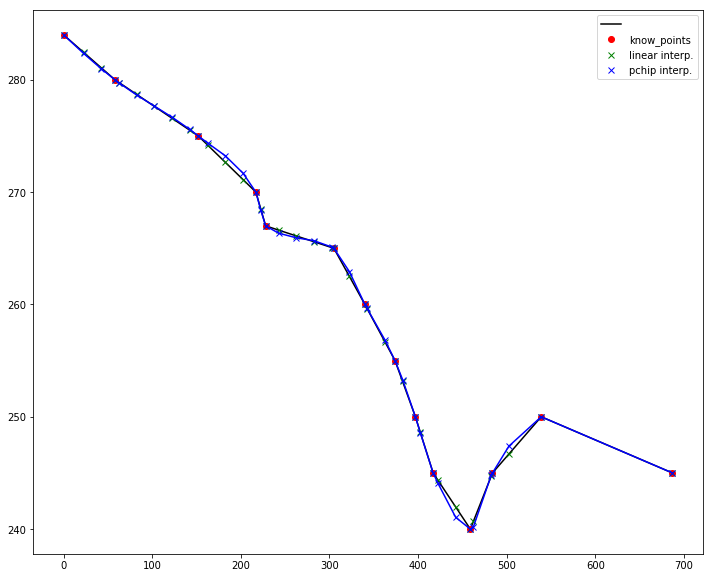

In [16]:
plt.figure(figsize=(12,10))
plt.plot(df['Distance'], df['Elevation'], '-k')
plt.plot(df['Distance'], df['Elevation'], 'or')
plt.plot(df_lin.index, df_lin['Elevation'], 'xg')
plt.plot(df_pchip.index, df_pchip['Elevation'], 'xb')
plt.plot(df_pchip.index, df_pchip['Elevation'], '-b')
plt.legend([' ', 'know_points', 'linear interp.', 'pchip interp.'])

## Function to compute y the length of a curve know on some points and approximated by a pchip interpolation

In [17]:
def cclength(known_points, x_start=0, x_end=1):
    length = 0
    known_points = np.array(known_points)
    x_i = np.array(known_points[0])
    y_i = np.array(known_points[1])
    interp = PchipInterpolator(x_i, y_i)
    poly = PPoly.from_bernstein_basis(interp, extrapolate=None)
    coefs = poly.c
    print(coefs)
    poly_derivative = PPoly.from_bernstein_basis(interp.derivative(), extrapolate=None)
    coefs_derivative = poly_derivative.c
    n_intervals = len (coefs_derivative[0])
    l = []
    f = []
    f_derivative = []
    # create a list of function sqrt(1+(dy/dx)²)
    for i in range(n_intervals):
        f_derivative.append(lambda x : (1+(coefs_derivative[2][i]+coefs_derivative[1][i]*(x-x_i[i])+coefs_derivative[0][i]*(x-x_i[i])**2)**2)**0.5)
        f.append(lambda x : coefs[3][i]+coefs[2][i]*(x-x_i[i])+coefs[1][i]*(x-x_i[i])**2+coefs[0][i]*(x-x_i[i])**3)
        l.append((quad(f_derivative[i], x_i[i], x_i[i+1], epsrel=0.001))[0])
        ui = np.linspace(x_i[i], x_i[i+1], 10)
        vi = poly_derivative(ui)
        plt.plot(ui, vi,'.k')
        print(f_derivative)
        ### for debugging only ###
        print('(1+(',coefs_derivative[2][i], '+', coefs_derivative[1][i], '*(x-xi)+', coefs_derivative[0][i], '*(x-xi)**2)**2)**0.5)')
        print('xi: ', x_i[i], 'xi+1: ', x_i[i+1], 'length: ', (quad(f_derivative[i], x_i[i], x_i[i+1], epsrel=0.001))[0])
        ### print('know_points[0][',i,']: ', known_points[0][i])
        ### print('know_points[0][',i+1,']: ', known_points[0][i+1])
        ### print('length in interval: ', l[i])
        ###                    ###
    # for i in range(n_intervals):
    #     print(f_derivative[0](xi[i]),f_derivative[i](xi[i]))
    return sum(l), l, interp, f

## Example of cclength usage

In [18]:
alpha = np.linspace(np.pi, 0, 150)
xi = np.cos(alpha)
yi = np.sin(alpha)

beta = np.linspace(np.pi, 0, 120)
xn = np.cos(beta)
y0 = np.sin(beta)

In [19]:
#xi = np.linspace(0, 10, 50)
#yi = (np.exp(xi) + np.exp(-xi))/2

In [20]:
xi = df['Distance']
yi = df['Elevation']

In [21]:
interp = PchipInterpolator(xi, yi)
yn = interp(xn)
coefs = PPoly.from_bernstein_basis(interp, extrapolate=False).c

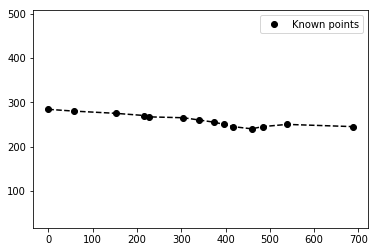

In [22]:
#plt.plot(xn, y0, '--k', label='True values')
plt.plot(xi, yi, 'ok', label='Known points')
plt.plot(xi, yi, '--k', label='')
#plt.plot(xn, yn, label='pchip')
plt.axis('equal')
plt.legend()
plt.show()

In [23]:
n_intervals = len(coefs[0])
ff=[]
for i in range(n_intervals):
    def f(j):
        def g(x) : return coefs[3][j]+coefs[2][j]*(x-xi[j])+coefs[1][j]*(x-xi[j])**2+coefs[0][j]*(x-xi[j])**3
        return g(i)
    xx = np.linspace(xi[i], xi[i+1], 10)
    yy = ff[i](xx)
    plt.plot(xx, yy, '-k')
# plt.axis('equal')

[[  6.74149100e-07  -2.02512087e-06  -1.13850094e-05   2.87048918e-03
   -9.43634498e-06   7.56377969e-05  -2.46227663e-05   4.57517004e-05
    2.46769146e-04   3.95345661e-05  -4.30163934e-04  -1.67506251e-05
   -1.54235682e-06]
 [  6.46758514e-05   2.70011930e-04   5.35029106e-04  -4.37915408e-02
    1.16558317e-03  -5.35408981e-03   7.74787593e-04  -2.78043794e-03
   -5.78857902e-03  -4.86436428e-04   1.87540984e-02   1.89676196e-04
    0.00000000e+00]
 [ -7.49845542e-02  -6.06786427e-02  -6.35983040e-02  -1.38349515e-01
   -5.97758406e-02  -4.81203008e-02  -1.44937684e-01  -1.77643881e-01
   -2.32936078e-01  -1.68356264e-01   0.00000000e+00   1.31147541e-01
    0.00000000e+00]
 [  2.84000000e+02   2.80000000e+02   2.75000000e+02   2.70000000e+02
    2.67000000e+02   2.65000000e+02   2.60000000e+02   2.55000000e+02
    2.50000000e+02   2.45000000e+02   2.40000000e+02   2.45000000e+02
    2.50000000e+02]]
[<function cclength.<locals>.<lambda> at 0x7f25c2ed8d08>]
(1+( -0.0749845541955

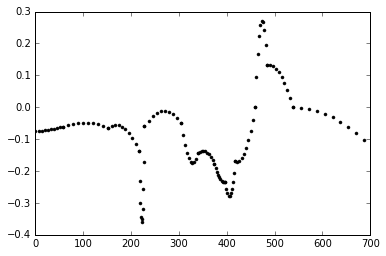

In [42]:
total_length, pieces_length, interp, f =cclength([xi,yi])

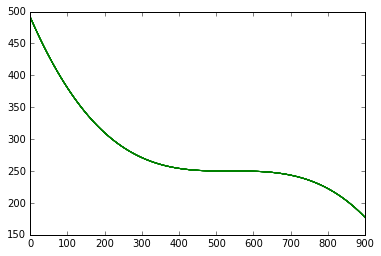

In [43]:
for i in range(len(f)):
    xi = np.linspace(0,900,100)
    yi = f[i](xi)
    plt.plot(xi,yi, '-g')

In [21]:
total_length

691.1834714570825

In [22]:
def binsearch(a,x):
    """ searches where to insert a value x in an ordered list a """
    return min(len(a)-2,max(0, bisect_left(a, x)-1))

In [23]:
def x_from_d_along_curve(known_points=[xi,yi], distance=2):
    total_length, pieces_length, interp, f =cclength(known_points)
    cl = list(np.cumsum(pieces_length))
    i = binsearch(cl, distance)
    print(i)
    print(known_points[0][i], ': ', cl[i], ' - ', known_points[0][i+1], ': ', cl[i+1])
    print('elevation: ',f[i]())
    x = fminbound(lambda x: distance-f[i](x-known_points[0][i]), known_points[0][i], known_points[1][i+1])
    return x

[[  4.62661657e-06   4.62614669e-06   4.62611387e-06   4.62607926e-06
    4.62604274e-06   4.62600417e-06   4.62596339e-06   4.62592021e-06
    4.62587447e-06   4.62582593e-06   4.62577439e-06   4.62571957e-06
    4.62566120e-06   4.62559896e-06   4.62553251e-06   4.62546145e-06
    4.62538535e-06   4.62530372e-06   4.62521601e-06   4.62512160e-06
    4.62501979e-06   4.62490979e-06   4.62479070e-06   4.62466148e-06
    4.62452096e-06   4.62436777e-06   4.62420034e-06   4.62401686e-06
    4.62381520e-06   4.62359288e-06   4.62334698e-06   4.62307403e-06
    4.62276994e-06   4.62242976e-06   4.62204755e-06   4.62161608e-06
    4.62112653e-06   4.62056796e-06   4.61992676e-06   4.61918578e-06
    4.61832320e-06   4.61731085e-06   4.61611192e-06   4.61467756e-06
    4.61294179e-06   4.61081378e-06   4.60816567e-06   4.60481288e-06
    4.60048095e-06   4.59474728e-06   4.58693362e-06   4.57589479e-06
    4.55957115e-06   4.53394573e-06   4.49028957e-06   4.40652045e-06
    4.21229942e-06  

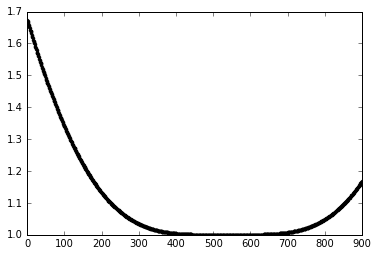

In [24]:
x_from_d_along_curve(known_points=[xi, yi], distance=2)

In [67]:
xs = 1
b=1
c=0
d=0
g = lambda x : (1+(b+c*(x-xs)+d*(x-xs)**2)**2)**0.5
l = quad(g, 0, 1)[0]
l

1.4142135623730954

In [68]:
xi = np.linspace(0,2,20)
yi = g(xi)

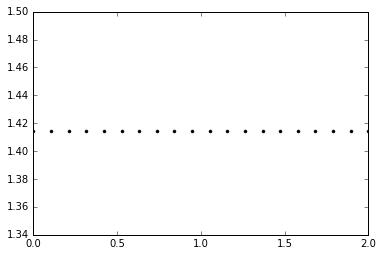

In [69]:
plt.plot(xi, yi, '.k')

# Essai de découpage des fonctions

In [13]:
t=np.linspace(np.pi, 0, 17)
x = np.cos(t)
y = np.sin(t)
known_points=[x.tolist(), y.tolist()]

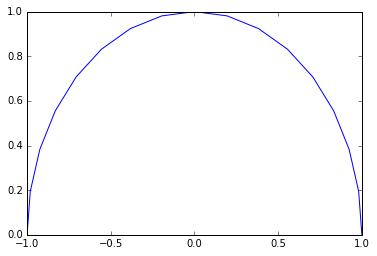

In [14]:
plt.plot(known_points[0], known_points[1])

In [69]:
def pchip_coefs(known_points, x_start=0, x_end=1):
    known_points = np.array(known_points).T
    x_i = np.array(known_points[0])
    y_i = np.array(known_points[1])
    interp = PchipInterpolator(x_i, y_i)
    poly = PPoly.from_bernstein_basis(interp, extrapolate=None)
    coefs = poly.c
    return coefs

In [70]:
coefs=pchip_coefs(known_points)
coefs

array([[  6.74149100e-07,  -2.02512087e-06,  -1.13850094e-05,
          2.87048918e-03,  -9.43634498e-06,   7.56377969e-05,
         -2.46227663e-05,   4.57517004e-05,   2.46769146e-04,
          3.95345661e-05,  -4.30163934e-04,  -1.67506251e-05,
         -1.54235682e-06],
       [  6.46758514e-05,   2.70011930e-04,   5.35029106e-04,
         -4.37915408e-02,   1.16558317e-03,  -5.35408981e-03,
          7.74787593e-04,  -2.78043794e-03,  -5.78857902e-03,
         -4.86436428e-04,   1.87540984e-02,   1.89676196e-04,
          0.00000000e+00],
       [ -7.49845542e-02,  -6.06786427e-02,  -6.35983040e-02,
         -1.38349515e-01,  -5.97758406e-02,  -4.81203008e-02,
         -1.44937684e-01,  -1.77643881e-01,  -2.32936078e-01,
         -1.68356264e-01,   0.00000000e+00,   1.31147541e-01,
          0.00000000e+00],
       [  2.84000000e+02,   2.80000000e+02,   2.75000000e+02,
          2.70000000e+02,   2.67000000e+02,   2.65000000e+02,
          2.60000000e+02,   2.55000000e+02,   2.500

In [71]:
def cclength(coefs, x_start=0.0, x_end=1.0):
    G = lambda x : (1+(coefs[2]+2*coefs[1]*(x)+3*coefs[0]*(x)**2)**2)**0.5
    l = quad(G, 0, x_end-x_start, epsrel=0.001)
    return l[0]

In [72]:
f_list = []
for i in range(len(coefs.T)):
    
    def f(j): # to avoid problems due to lexical closures
        def func(x): return coefs[3][j]+coefs[2][j]*x+coefs[1][j]*(x)**2+coefs[0][j]*(x)**3
        return func
    f_list.append(f(i)) 

[ 284.49352962] [ 360.47191291]


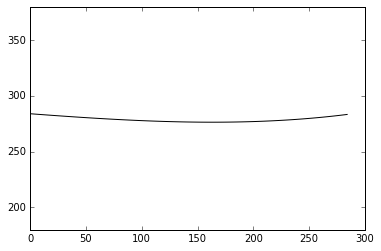

In [73]:
l=[]
ll=[]
for i in range(len(known_points[0])-1):
    t = np.linspace(0,known_points[0][i+1]-known_points[0][i],101)
    u = f_list[i](t)
    l.append(cclength(coefs.T[i],known_points[0][i],known_points[0][i+1]))
    plt.plot(known_points[0][i]+t, u, '-k')
    ll.append(((known_points[0][i+1]-known_points[0][i])**2+(known_points[1][i+1]-known_points[1][i])**2)**0.5)
plt.axis('equal')
lt=np.cumsum(np.array(l))
llt=np.cumsum(np.array(ll))
print(lt, llt)

In [74]:
def cclength2abs(coefs, x_start, length, x_tol=1e-05):
    from scipy.optimize import root
    F = lambda x : length - cclength(coefs, x_start, x)
    x = root(F, x_start)
    return x.x

In [75]:
cclength2abs(coefs.T[0],0,0.1)

array([ 0.09972009])

In [84]:
def cclength2xz(known_points, distances):
    known_points = np.array(known_points).T
    np.array(distances.sort())
    print(known_points)
    x_i = np.array(known_points[0])
    y_i = np.array(known_points[1])
    print(x_i, y_i)
    interp = PchipInterpolator(x_i, y_i)
    poly = PPoly.from_bernstein_basis(interp, extrapolate=None)
    coefs = poly.c.T
    szd = len(distances)
    szj = len(coefs)
    print(coefs)
    print('szj=', szj)
    l = []
    for j in range(szj):
        l.append(cclength(coefs[j], 0, x_i[j+1]-x_i[j]))
    l = np.cumsum(np.array(l))
    print(l)
    i = 0
    j = 0
    xz = np.array([[np.nan, np.nan]]*szd)
    while (i<szd):
        if distances[i]<=l[j]:
            xz[i,0] = cclength2abs(coefs[j], 0, distances[i])
            xz[i,0] = xz[i,0] + x_i[j]
            xz[i,1] = interp(xz[i,0])
            print('i=', i, 'd=', distances[i])
            i+=1
        elif j<szj:
            distances = distances - l[j]
            j+=1
            print('j=', j)
        else:
            print('out of range')
            break
    return xz

In [85]:
np.array(known_points[0])

array([  0, 284])

In [90]:
xz = cclength2xz(known_points, np.linspace(0,500,21))
xz

[[  0  58 152 217 228 305 340 374 397 417 459 484 539 687]
 [284 280 275 270 267 265 260 255 250 245 240 245 250 245]]
[  0  58 152 217 228 305 340 374 397 417 459 484 539 687] [284 280 275 270 267 265 260 255 250 245 240 245 250 245]
[[  6.74149100e-07   6.46758514e-05  -7.49845542e-02   2.84000000e+02]
 [ -2.02512087e-06   2.70011930e-04  -6.06786427e-02   2.80000000e+02]
 [ -1.13850094e-05   5.35029106e-04  -6.35983040e-02   2.75000000e+02]
 [  2.87048918e-03  -4.37915408e-02  -1.38349515e-01   2.70000000e+02]
 [ -9.43634498e-06   1.16558317e-03  -5.97758406e-02   2.67000000e+02]
 [  7.56377969e-05  -5.35408981e-03  -4.81203008e-02   2.65000000e+02]
 [ -2.46227663e-05   7.74787593e-04  -1.44937684e-01   2.60000000e+02]
 [  4.57517004e-05  -2.78043794e-03  -1.77643881e-01   2.55000000e+02]
 [  2.46769146e-04  -5.78857902e-03  -2.32936078e-01   2.50000000e+02]
 [  3.95345661e-05  -4.86436428e-04  -1.68356264e-01   2.45000000e+02]
 [ -4.30163934e-04   1.87540984e-02   0.00000000e+00   

array([[   0.        ,  284.        ],
       [  24.93371716,  282.1810147 ],
       [  49.87738991,  280.50451399],
       [  74.83465026,  279.04535721],
       [  99.80295624,  277.78736039],
       [ 124.77227206,  276.54931531],
       [ 149.73255179,  275.14268156],
       [ 174.66998669,  273.70055002],
       [ 199.56293314,  271.9604294 ],
       [ 166.56509234,  274.15200877],
       [ 191.51766635,  272.6196709 ],
       [ 216.38486469,  270.08446871],
       [ 240.96177301,  266.40047661],
       [ 264.85788599,  265.90774533],
       [ 287.5597013 ,  265.58080255],
       [ 308.62473365,  264.75883317],
       [ 327.84503852,  262.00822195],
       [ 345.25065365,  259.2567785 ],
       [ 236.69834901,  266.56202806],
       [ 245.1919564 ,  266.26889102],
       [ 249.88303327,  266.1511987 ]])

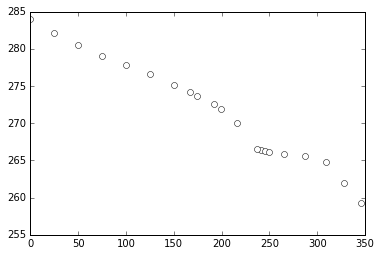

In [91]:
plt.plot(xz.T[0], xz.T[1], 'ow')